# Warmup: Sampling from a Closed-Form Distribution

## Import

In [ ]:
import numpy as np
from matplotlib import pyplot as plot
from scipy.stats import multivariate_normal
from matplotlib import cm
%matplotlib inline

plot.style.use('seaborn')

## Exercise 1

Implement a function that draws 1000 samples from an univariant gaussian distribution with mean 1 and a standard deviation of 0.2. Plot the experimental distribution using 30 bins. In order to compare it with the ground truth distribution, generate also the plot of such.

$f(x|\mu, \sigma^2) = \frac{1}{{\sqrt {2\pi\sigma^2 } }}\exp(-\frac{(x - \mu)^2}{2\sigma^2})$ - univariant gaussian distribution

In [ ]:
def get_samples_univariate_normal_distributed(mu, sigma, n):
    return np.random.normal(mu, sigma, n)

In [ ]:
def get_pdf_univariate_normal_distribution(X, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (X - mu)**2 / (2 * sigma**2))

In [ ]:
def plot_hist_and_pdf_univariate(X, F, bins=30):
    fig, (ax1, ax2) = plot.subplots(1, 2, figsize=(15, 6), dpi=90)

    fig.suptitle('Univariant gaussian distribution')

    ax1.hist(X, bins=bins, density=True)
    ax1.set_title('Histogram of univariant gaussian distribution')
    ax1.set(xlabel='x', ylabel='Probability density estimate')

    F_sorted = [y for _, y in sorted(zip(X, F))]
    X_sorted = np.sort(X)

    ax2.plot(X_sorted, F_sorted)
    ax2.set_title('PDF of univariant gaussian distribution')
    ax2.set(xlabel='x', ylabel='$f(x|\mu, \sigma^2)$')

In [ ]:
mu = 1
sigma = 0.2
n_uni = 1000
X = get_samples_univariate_normal_distributed(mu, sigma, n_uni)
F = get_pdf_univariate_normal_distribution(X, mu, sigma)

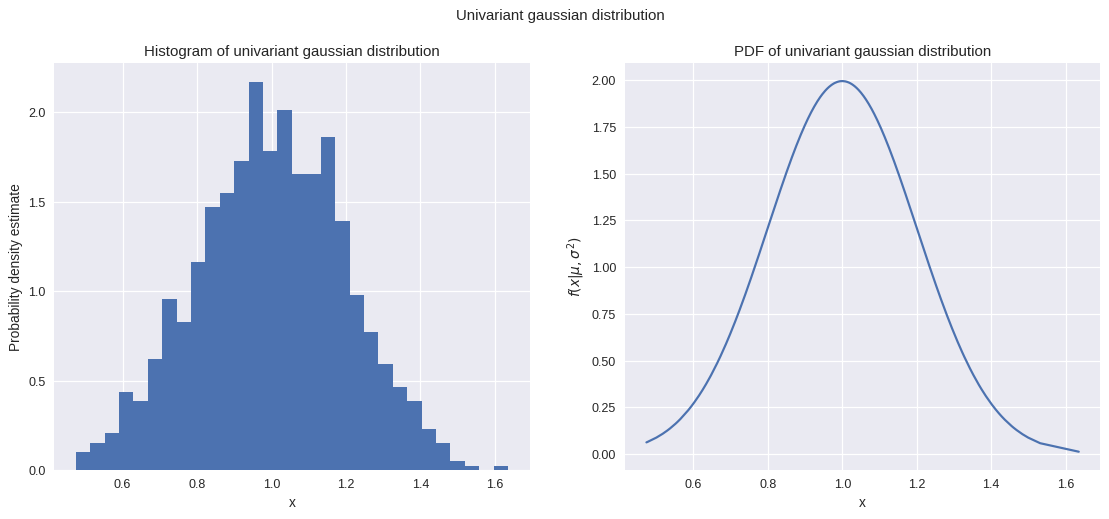

In [ ]:
plot_hist_and_pdf_univariate(X, F)

## Exercise 2

Implement a function that draws 10000 samples from a multivariant gaussian distribution (2D in this case) with mean mean vector [0.5, −0.2] and covariance matrix [[2.0, 0.3], [0.3, 0.5]]. Plot the experimental distribution using 30 bins (30x30). In order to compare it with the ground truth distribution, generate also the plot of such.

$f(x|\mu, \Sigma) = \frac{1}{{\sqrt{\det(2\pi\Sigma)} }}\exp(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x-\mu))$ - multivariate gaussian distribution

In [ ]:
def get_samples_multivariate_normal_distributed(mean, covariance, n):
    return np.random.multivariate_normal(mean, covariance, n)

In [ ]:
def get_pdf_multivariate_normal_distribution(X, mean, covariance):
    return multivariate_normal.pdf(X, mean, covariance)

In [ ]:
mean = [0.5, -0.2]
cov = [[2.0, 0.3], [0.3, 0.5]]
n_mult = 10000
X = get_samples_multivariate_normal_distributed(mean, cov, n_mult)
F = get_pdf_multivariate_normal_distribution(X, mean, cov)

In [ ]:
def plot_hist_and_pdf_multivariate(X, F, bins=(30,30)):
    x, y = X.T
    fig, (ax2, ax1) = plot.subplots(1, 2, figsize=(15, 6), dpi=90, subplot_kw=dict(projection='3d'))
    fig.suptitle('Bivariate gaussian distribution')
    ax1.plot_trisurf(x, y, F, cmap=cm.coolwarm,
                    linewidth=0, 
                    antialiased=True)
    ax1.set_title('PDF of bivariate gaussian distribution')
    ax1.set(xlabel='x0', ylabel='x1', zlabel='$f(x|\mu, \Sigma)$')

    hist, xedges, yedges = np.histogram2d(x, y, bins=bins, density=True)
    xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

    xpos = xpos.flatten()/2.
    ypos = ypos.flatten()/2.
    zpos = np.zeros_like (xpos)

    dx = xedges [1] - xedges [0]
    dy = yedges [1] - yedges [0]
    dz = hist.flatten()

    ax2.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
    ax2.set_title('Histogram of bivariate gaussian distribution')
    ax2.set(xlabel='x0', ylabel='x1', zlabel='Probability density estimate')

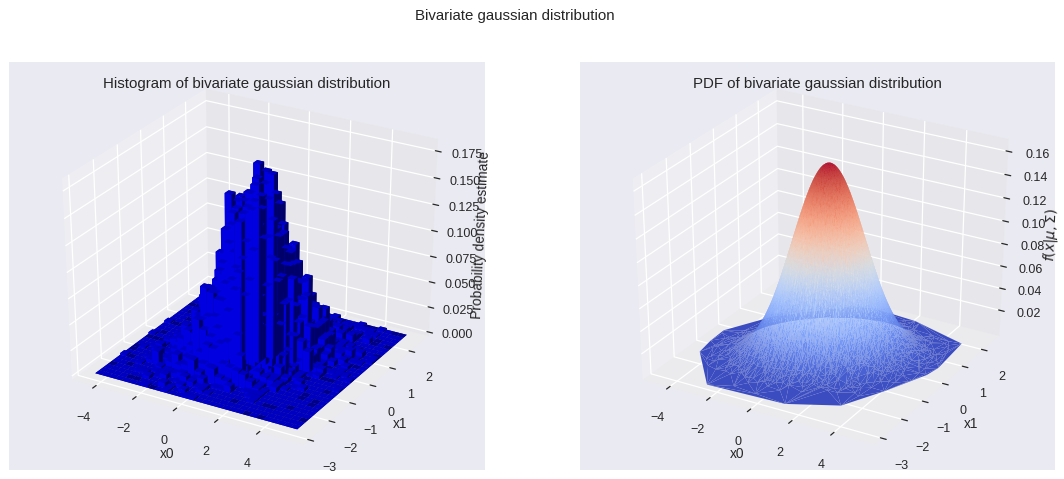

In [ ]:
plot_hist_and_pdf_multivariate(X, F)

## Exercise 3

Play with the amount of drawn samples and of the bins.
<ol type = "1">
    <li>What happens when you increase/decrease both?</li>
        The figures will look less and less like a normal  distribution if we decrease both bins and samples.
    <li>What happens when you increase one and decrease the other?</li>
    If we increase the number of bins, then the histogram will increasingly resemble a discrete distribution and strongly diverge from reality.
    <li>Are observations from these past two questions the same for the 1D and 2D cases</li> No, histogram approach suffers from high dimensionality.
    <li>What about changing the parameters of the ground truth distributions</li> They can be certainly changed.:smile:
</ol>

Observe the plots and select the one which turned the most interesting for you

### 1D

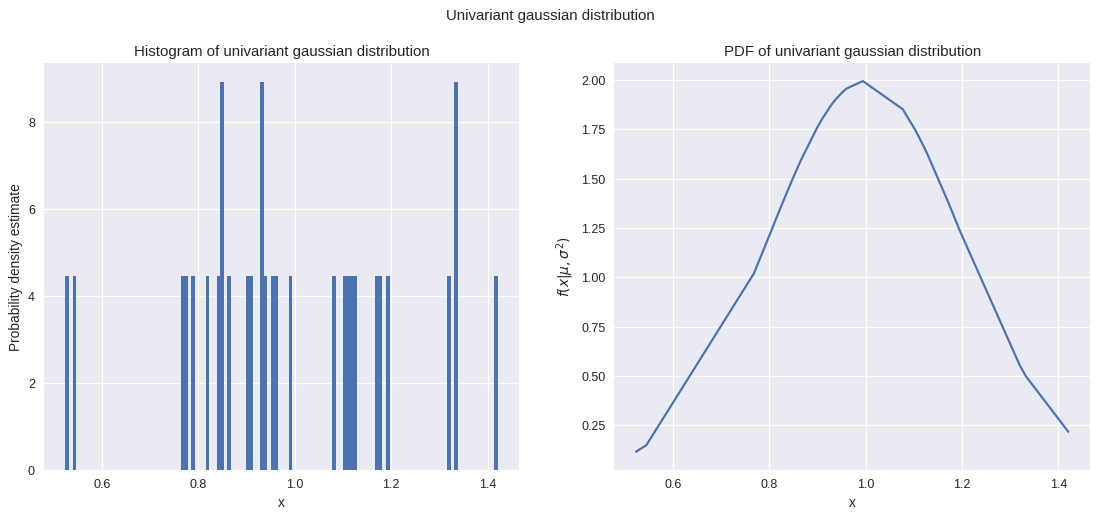

In [ ]:
n_uni = 30
X = get_samples_univariate_normal_distributed(mu, sigma, n_uni)
F = get_pdf_univariate_normal_distribution(X, mu, sigma)
plot_hist_and_pdf_univariate(X, F, 120)

From my point of view it's interesting example because, we cannot determine that a given sample is a Gaussian distribution using a histogram.

### 2D

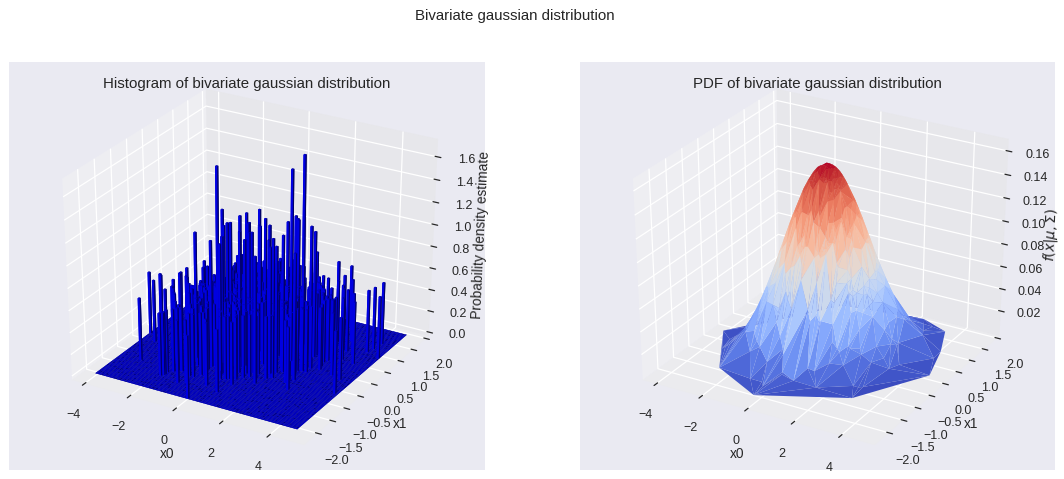

In [ ]:
n_mult = 500
mean = [0.5, -0.2]
cov = [[2.0, 0.3], [0.3, 0.5]]
X = get_samples_multivariate_normal_distributed(mean, cov, n_mult)
F = get_pdf_multivariate_normal_distribution(X, mean, cov)
plot_hist_and_pdf_multivariate(X, F, 100)

The same here